___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
#from sklearn.metrics import plot_confusion_matrix  # Import plot_confusion_matrix separately
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

#### Load Dataset

In [3]:
df0 = pd.read_csv('Mall_Customers.csv')
df = df0.copy()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.info()
#Gender is only one Dtype is [object]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#We changed the name to make it easier to write

df.rename(columns={"Annual Income (k$)":"Annual_Income",
          'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [6]:
df.shape
#There are 5 columns and 200 rows

(200, 5)

In [7]:
df.isnull().sum()


CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [11]:
df.describe(include="object").T
#count of non-null values, the number of unique values.
#the most frequent (top) value, and the frequency of the top value in each object column.

,count,unique,top,freq
Gender,200,2,Female,112


In [12]:
df.CustomerID.nunique()

200

In [13]:
df.drop(columns="CustomerID", inplace=True)
# CustomerID is like index for us, so we drop it.

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





(-1.25, 1.25, -1.25, 1.25)

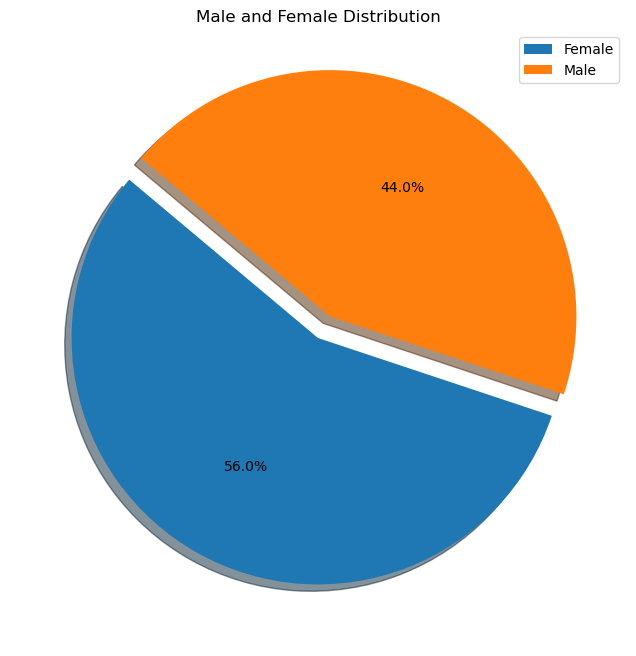

In [14]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)
plt.legend(labels=['Female', 'Male'])
plt.title('Male and Female Distribution')
plt.axis('off')
# We compare gender ratios, which is one of the important issues in customer segmentation.

In [15]:
gender_income = df[['Gender', 'Annual_Income']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual_Income
0,Female,59.250000
1,Male,62.227273


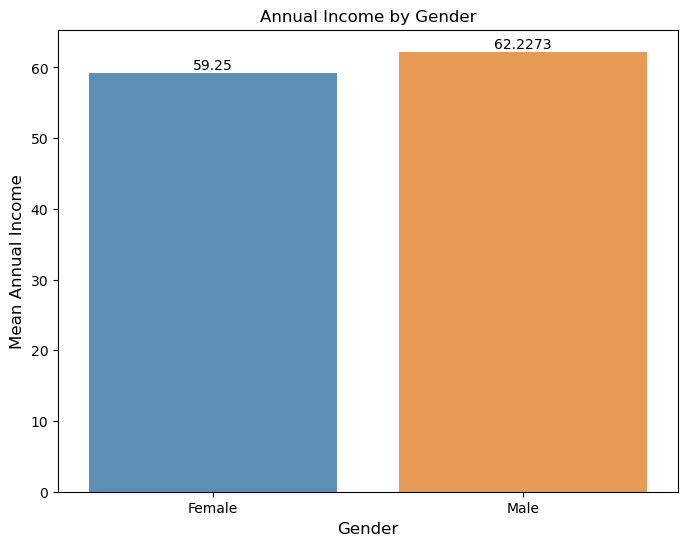

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x='Gender', y='Annual_Income', data=gender_income, alpha=0.8)
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income', fontsize=12)
plt.xlabel('Gender', fontsize=12)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

#There are more women in the data than men but men still earn more

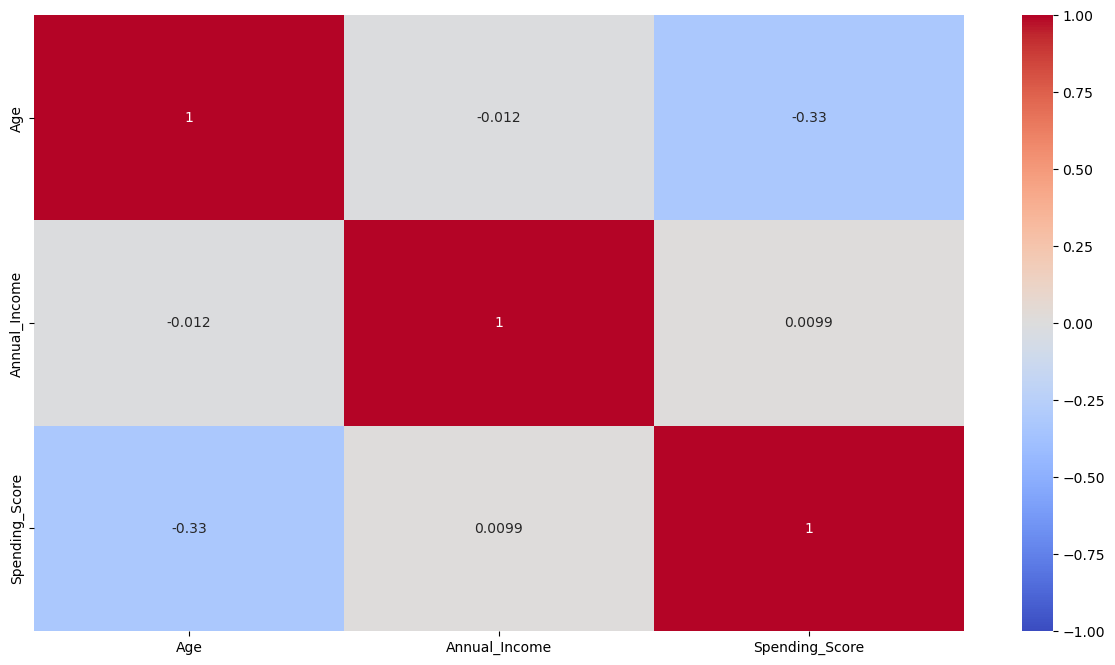

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

# We are investigating how features are correlated to understand how they trending bivariately.

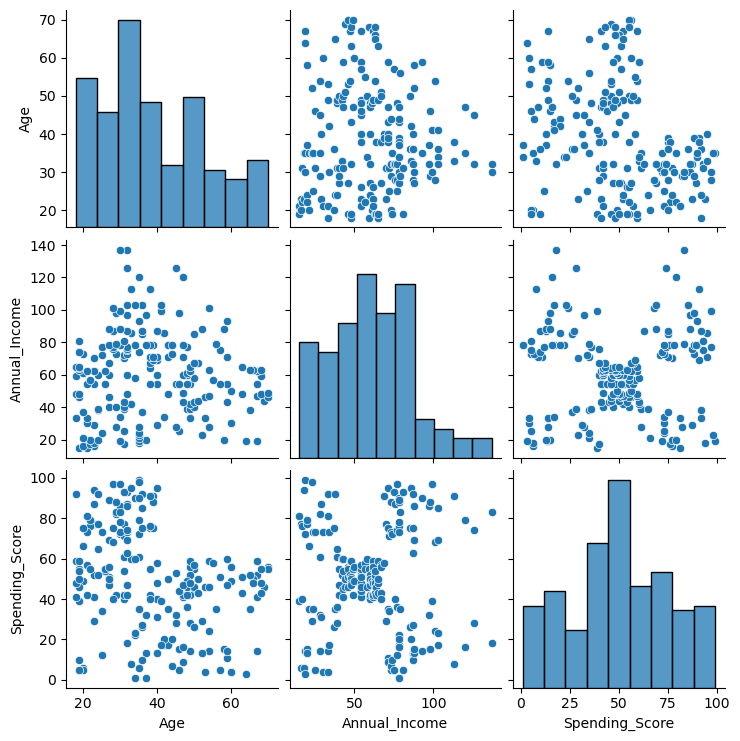

In [18]:
sns.pairplot(df);


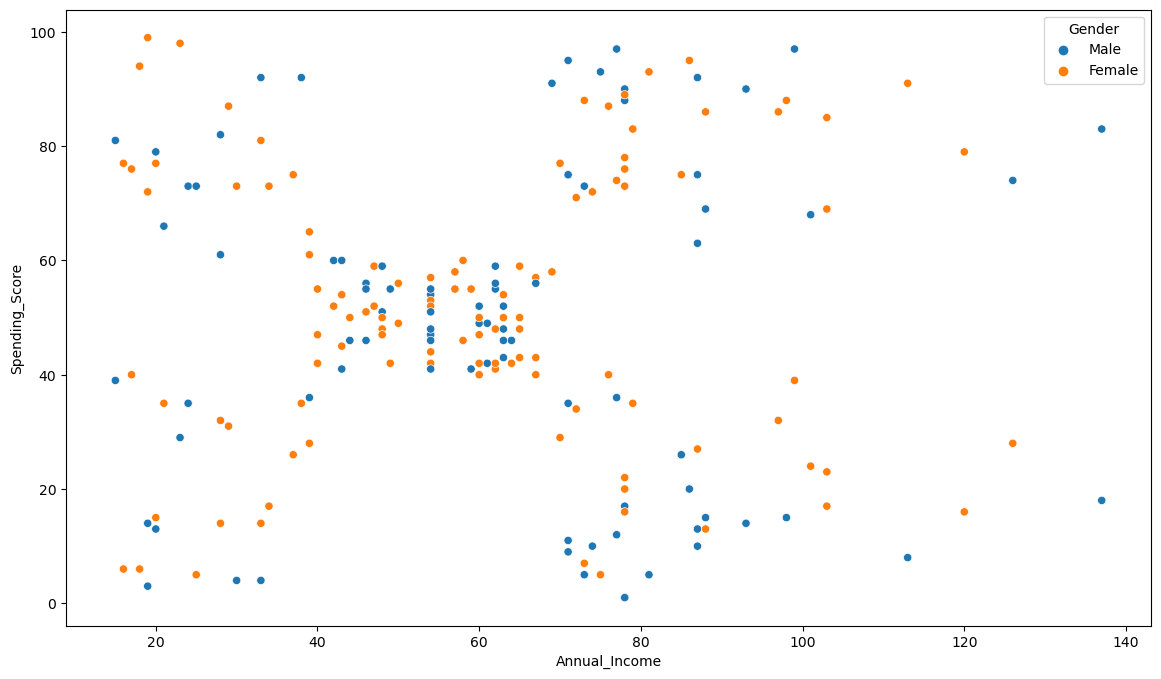

In [19]:
plt.figure(figsize=(14, 8))

sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue="Gender")
plt.show()

# We examine the gender distribution in the clustering we will build with 
#Spending_Score and Annual_Income, 
#which caught our attention above.

In [20]:
df.describe()


,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [21]:
print('Mean of Age:', df.Age.mean())
print('Min of Age:', df.Age.min())
print('Max of Age:', df.Age.max())


#Mean of Age: 38.85: The average age in the dataset is approximately 38.85 years.
#Min of Age: 18: The youngest person in the dataset is 18 years old.
#Max of Age: 70: The oldest person in the dataset is 70 years old.

Mean of Age: 38.85
Min of Age: 18
Max of Age: 70


In [22]:
df[(df['Spending_Score'] == df['Spending_Score'].max())]
#identifies the rows where the spending score is at its highest value. 

,Gender,Age,Annual_Income,Spending_Score
11,Female,35,19,99


In [23]:
df[(df['Annual_Income'] == df['Annual_Income'].max())]
#select the rows where the 'Annual_Income' column has the maximum value.

,Gender,Age,Annual_Income,Spending_Score
198,Male,32,137,18
199,Male,30,137,83


In [24]:
df.head()


,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [25]:
df_num = df.select_dtypes(include=np.number)
df_num.head()
#I want to work specifically with the numerical columns in my dataset and perform numeric operations.

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [26]:
df_num.corr()


,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


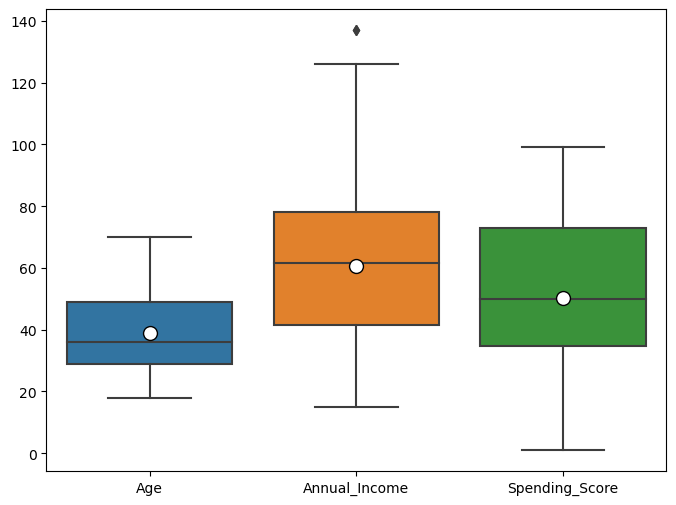

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [28]:
df1 = df.drop(columns="Gender")
df1
#because k-means clustering typically works with numerical data and doesn't handle categorical variables directly.

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


 Analyze if a dataset is clusterable."" Scores ranging from 0 to 1 indicate no clusterability, scores around 0.5 indicate no cluster propensity, and scores close to 0 indicate a strong cluster tendency.
 
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.

    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)

    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
   


In [29]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd


def hopkins(data_frame, sampling_size):
   
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    # Sample n observations from D : P

    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')

    data_frame_sample = data_frame.sample(n=sampling_size)

    # Get the distance to their neirest neighbors in D : X

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    # Randomly simulate n points with the same variation as in D : Q.

    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()

    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)

    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)

    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)

    # Get the distance to their neirest neighbors in D : Y

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    # return the hopkins score

    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')

    return x / (x + y)[0]

In [30]:
hopkins(df1, df1.shape[0])

# With hopkins test, whether the data is uniform or randomly distributed, it returns us a result about it.
# We say that the closer it is to 0, the more prone to data clustering.

0.3194588271590552

In [31]:
X1=df.loc[:,['Age','Spending_Score']]
#two variables that I choice
X1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


In [32]:
X1.shape


(200, 2)

In [33]:
hopkins(X1, X1.shape[0])
#it is closer to 0, the more prone to data clustering.

0.3014048782577789

#### *ii. Determine optimal number of clusters*

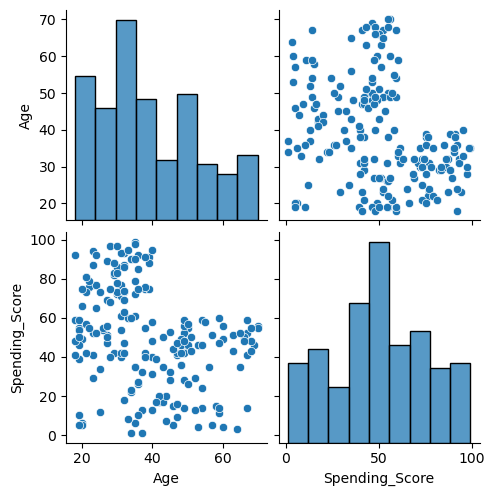

In [34]:
sns.pairplot(X1);
# We look at the distributions of age and spending score.

# Elbow metod

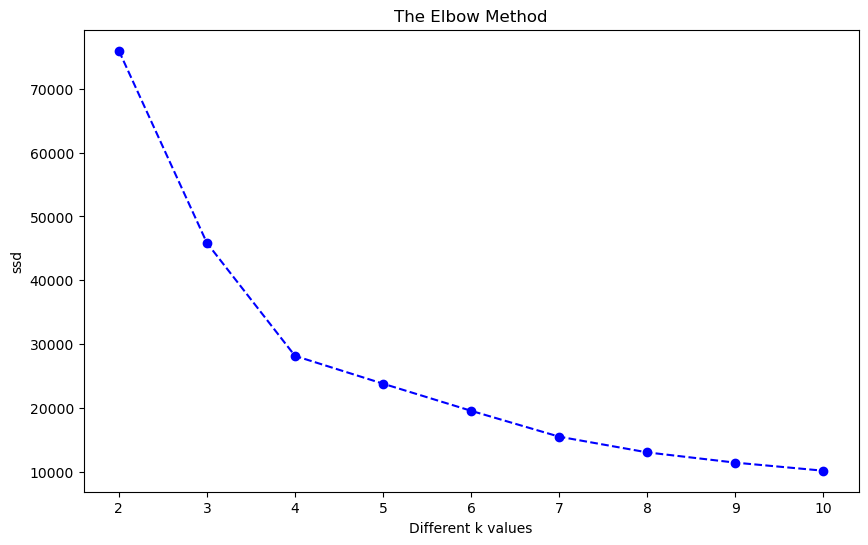

In [35]:
from sklearn.cluster import KMeans
ssd = []

K = range(2,11)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X1)
    ssd.append(model.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("ssd") 
plt.title("The Elbow Method") 
plt.show()

#the plot to determine the optimal number of clusters for your data. 
#It appears that the elbow point could be around k = 3 or 4


In [36]:
ssd


[75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23811.52352472089,
 19566.522341377608,
 15514.193134351035,
 13055.626865965576,
 11453.288911292719,
 10186.50107324238]

In [37]:
-pd.Series(ssd).diff()


0             NaN
1    30108.479394
2    17675.093049
3     4354.060042
4     4245.001183
5     4052.329207
6     2458.566268
7     1602.337955
8     1266.787838
dtype: float64

In [38]:
#pip install yellowbrick


Text(0.5, 1.0, 'elbow method')

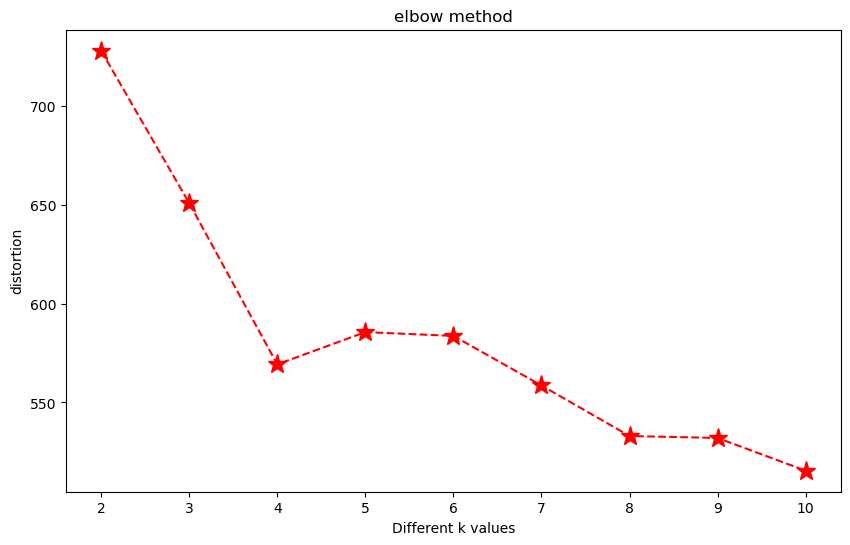

In [39]:
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42) #Create a K-Means model with k clusters and a random state:
    kmeanModel.fit(X1) #Fit the K-Means model to your data
    distances = kmeanModel.transform(X1) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i]
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))
#The loop iterates over each cluster (from 0 to k-1).
#cluster_distances contains the distances from observations in each cluster to their own centroid.
#The mean of squared distances for each cluster is calculated and added to the result list.


plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

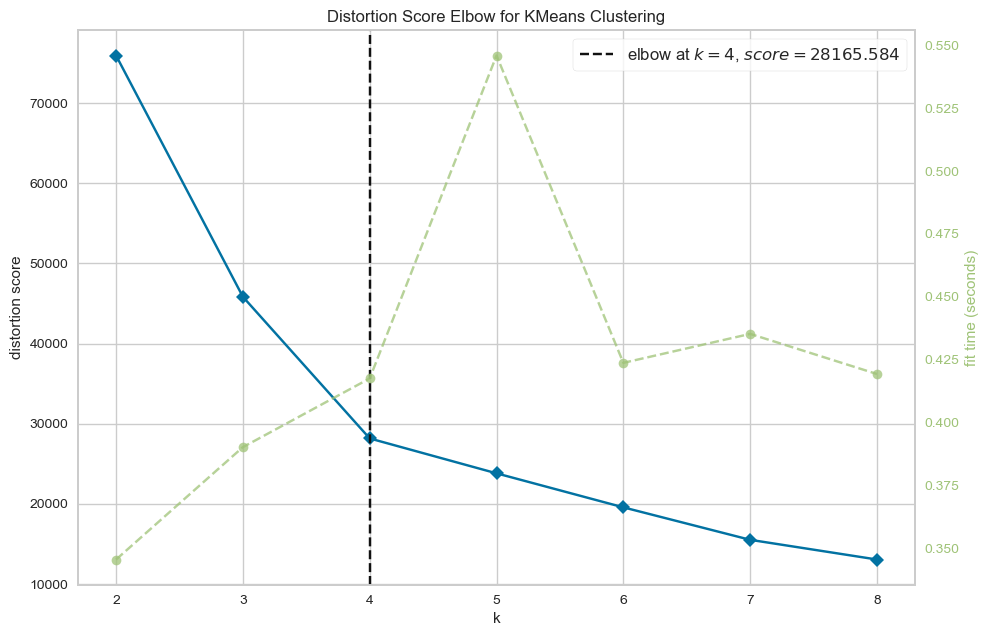

In [40]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42) #K-Means clustering model is created with a specified random state (for reproducibility)
visualizer = KElbowVisualizer(model_, k=(2, 9), size=(1080, 720))

visualizer.fit(X1)        
visualizer.poof();

In [41]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854
For n_clusters=9, the silhouette score is 0.41447652571263843
For n_clusters=10, the silhouette score is 0.40744304730373593


# silhoutte score : determine the optimal number of clusters (k) for a K-Means clustering analysis

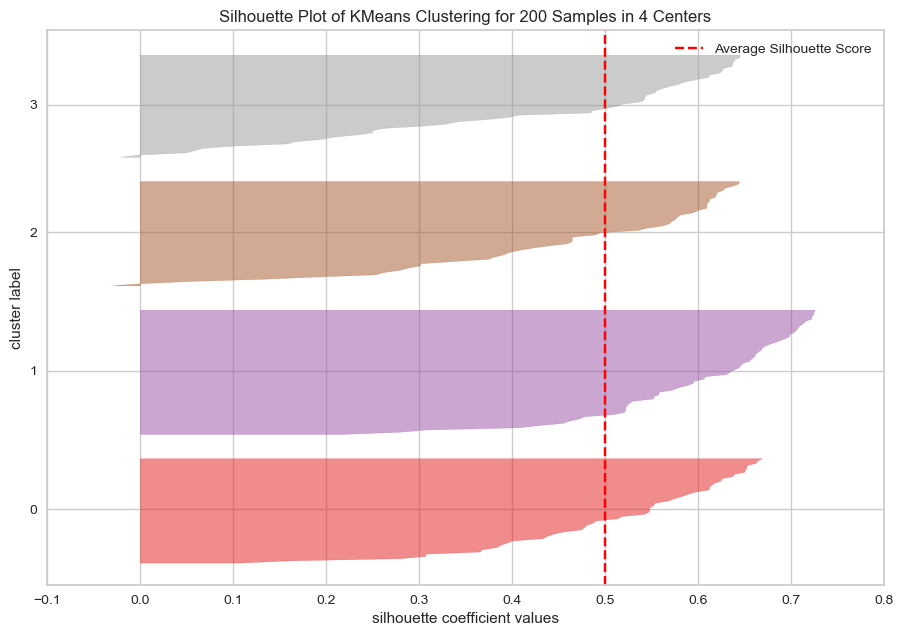

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

model_ssd = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model_ssd, size=(1080, 720))

visualizer.fit(X1)# fitted to your data visualizer
visualizer.poof() #method generates and displays the elbow plot

In [43]:
model_ssd.n_clusters
#We can get the number of clusters with .n_clusters.

4

In [44]:
for i in range(model_ssd.n_clusters):
    label = (model_ssd.labels_ == i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.5960779476836082
mean silhouette score for label 2    : 0.45429047261675404
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


# silhouette_score

### Why silhouette_score is negative?

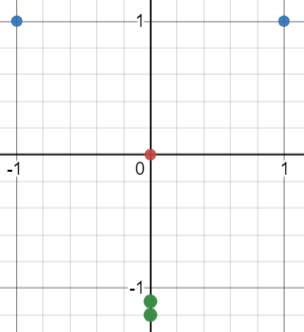

#### *iii. Apply K Means*

In [45]:
modelk = KMeans(n_clusters=4, random_state=42)
y_kmeans = modelk.fit_predict(X1)
y_kmeans

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [46]:
df_X1 = X1.copy()
df_X1
# We perform the copy operation as we will perform a clustering operation and compare it with Hierarchical Clustering.

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


In [47]:
df_X1["cluster_Kmeans"] =  y_kmeans #kmeans.labels_

# Add cluster_Kmeans as a column to df_X1.
df_X1

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
5,22,76,1
6,35,6,2
7,23,94,1
8,64,3,2
9,30,72,1


In [48]:
df_X1['cluster_Kmeans'].unique()


array([3, 1, 2, 0])

#### *iv. Visualizing and Labeling All the Clusters*

In [49]:
centers = modelk.cluster_centers_
centers
# center point coordinates

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

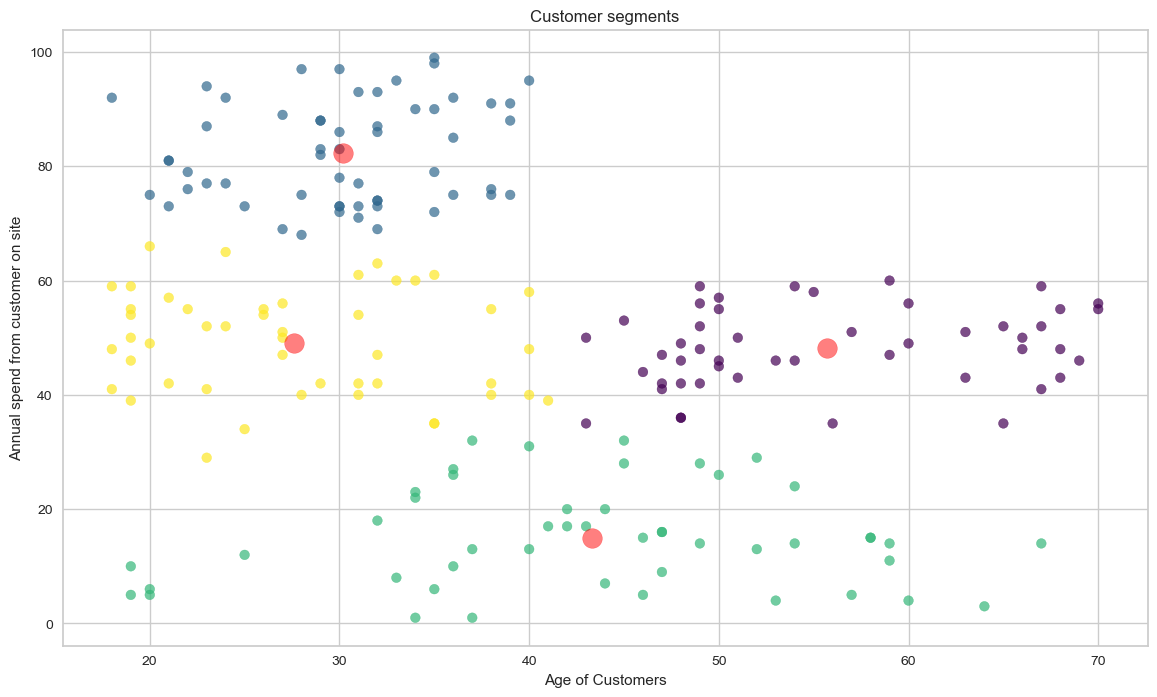

In [50]:
plt.figure(figsize=(14,8))
plt.scatter(df["Age"], df["Spending_Score"],
            c=df_X1.cluster_Kmeans, cmap="viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Customer segments')
plt.xlabel('Age of Customers')
plt.ylabel('Annual spend from customer on site');

#At particular age ranges, people exhibit specific shopping tendencies.
#Therefore, the campaigns we will apply to yellow and purple will not be the same.

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [51]:
X2=df[['Annual_Income','Spending_Score']]
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [52]:
X2.shape


(200, 2)

In [53]:
hopkins(X2, X2.shape[0])
#remember if it is closer to 0, the more prone to data clustering.

0.3130573161090385

#### *ii. Determine optimal number of clusters*

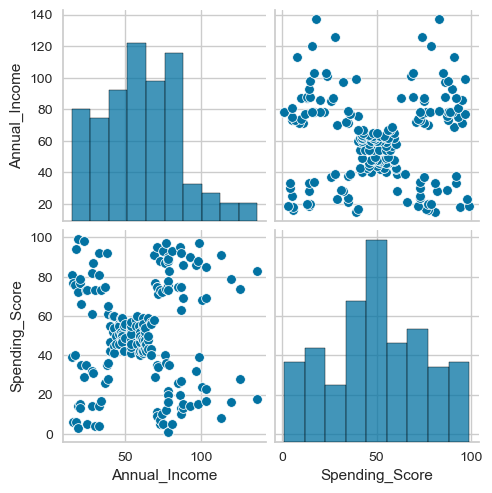

In [54]:
sns.pairplot(X2)

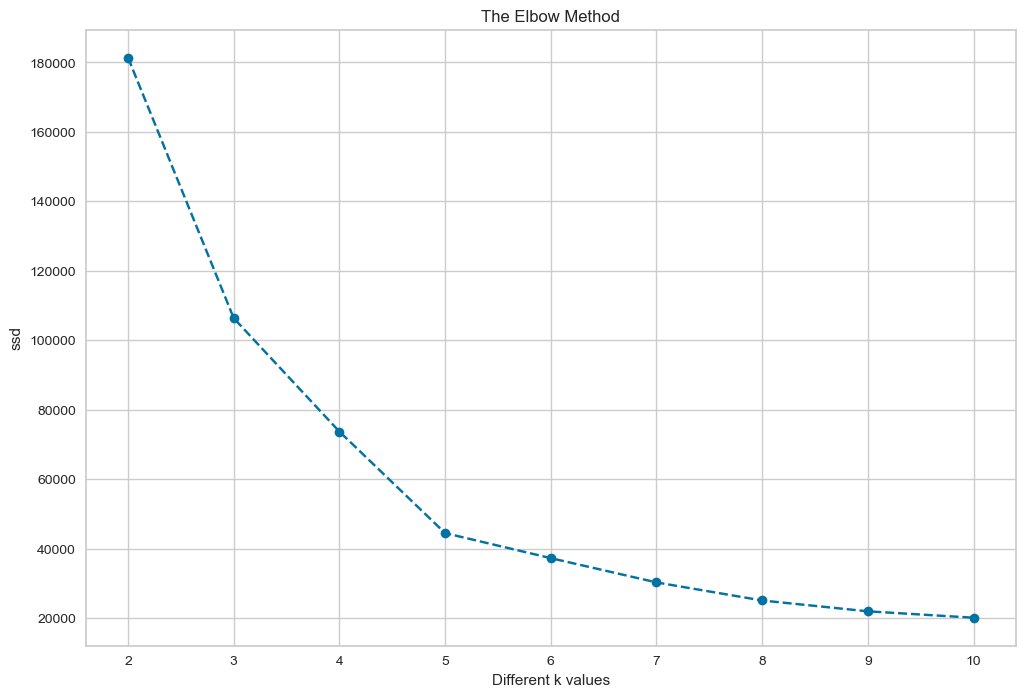

In [55]:
ssd = []

K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters =k, random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("ssd") 
plt.title("The Elbow Method");

In [56]:
-pd.Series(ssd).diff()


0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6992.470893
6     5204.926014
7     3119.622814
8     1844.723850
dtype: float64

Text(0.5, 1.0, 'elbow method')

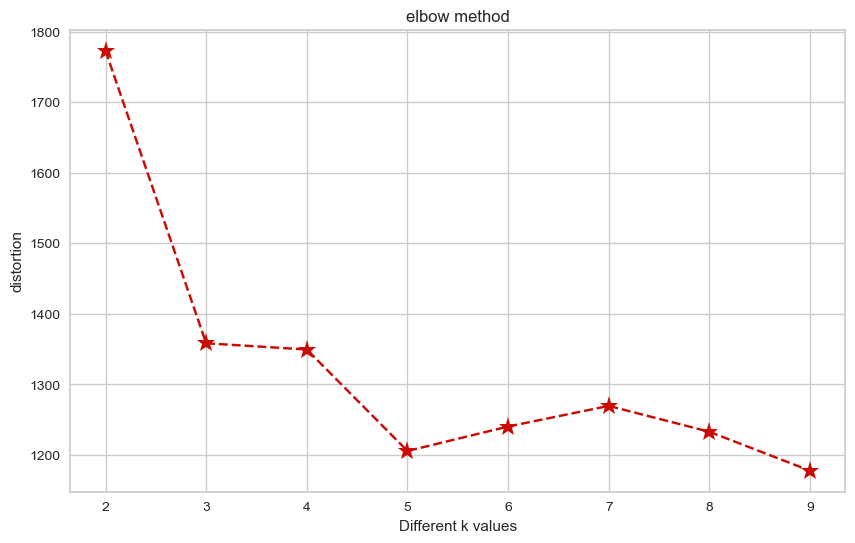

In [57]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X2)
    distances = kmeanModel.transform(X2) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### silhouette_score

In [58]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283
For n_clusters=9, the silhouette score is 0.4561091950997367


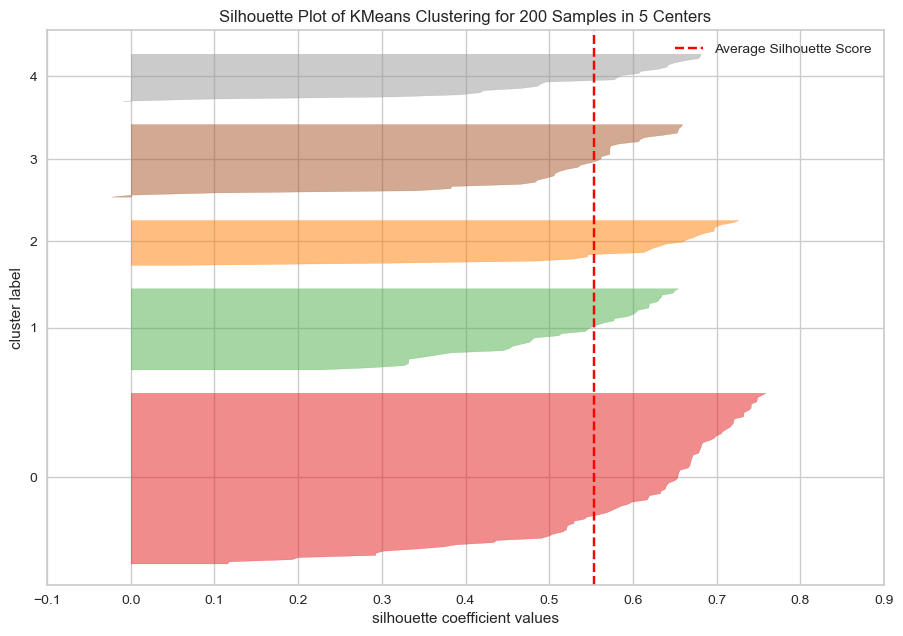

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4, size=(1080, 720))

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof()

WE CAN see that cluster 0 is higher than other clusters

In [60]:
#model3.n_clusters

for i in range(model4.n_clusters):
    label = (model4.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5091706489322517
mean silhouette score for label 2    : 0.5990128687006722
mean silhouette score for label 3    : 0.5039873487056818
mean silhouette score for label 4    : 0.5122676140736505
mean silhouette score for all labels : 0.553931997444648


mean silhouette scores for individual clusters (labels) range from approximately 0.503 to 0.599,
with label 2 having the highest score (0.599), indicating well-separated and internally cohesive clusters.

#### *iii. Apply K Means*

In [61]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X2)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [62]:
copyX2 = X2.copy()
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [63]:
copyX2['cluster_Kmeans'] = kmeans2.fit_predict(X2) #kmeans2.labels_
copyX2

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
5,17,76,2
6,18,6,4
7,18,94,2
8,19,3,4
9,19,72,2


#### *iv. Visualizing and Labeling All the Clusters*

In [64]:
centers = model.cluster_centers_ # merkez noktasi koordinatlari
centers

array([[29.1       , 74.83333333],
       [57.91666667, 11.33333333],
       [25.06666667, 41.33333333],
       [64.85      , 49.85      ],
       [24.28571429,  6.71428571],
       [31.37037037, 90.7037037 ],
       [25.08695652, 56.43478261],
       [42.95      , 33.65      ],
       [41.15      , 13.95      ],
       [48.19230769, 49.84615385]])

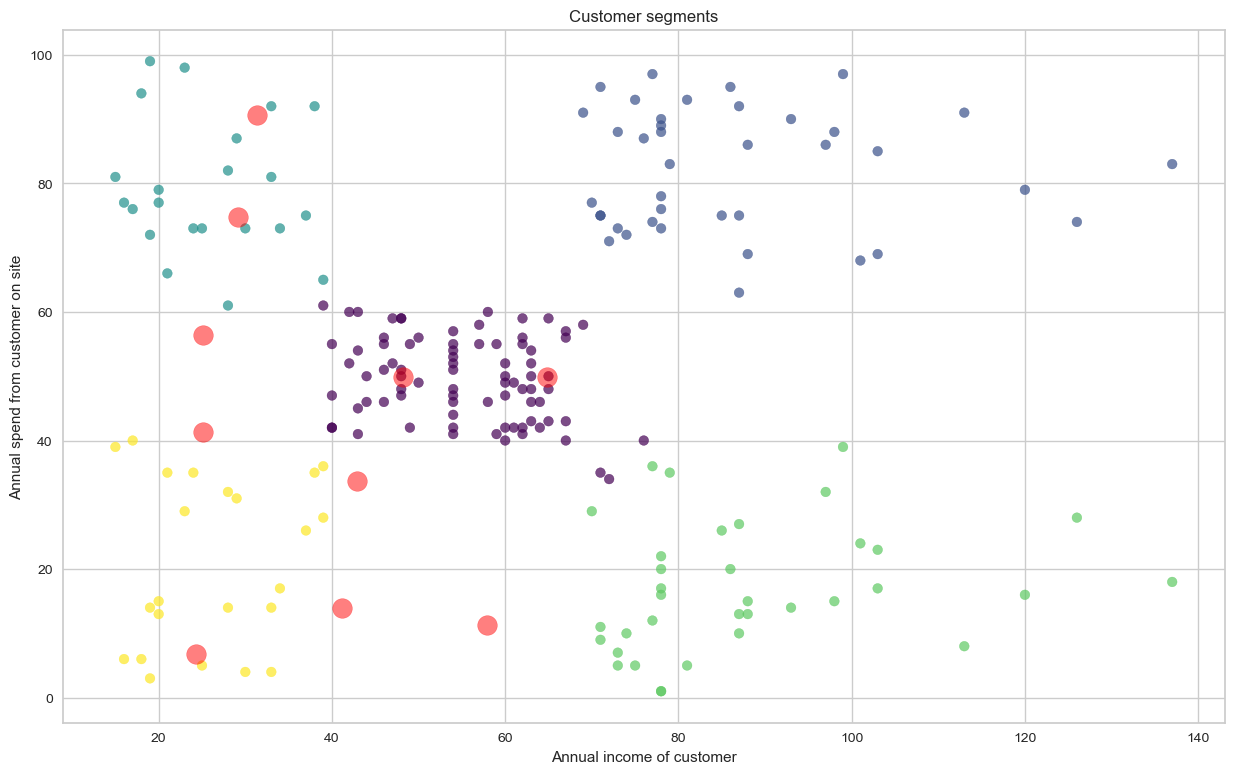

In [65]:
plt.figure(figsize=(15, 9))
plt.scatter(copyX2["Annual_Income"], copyX2["Spending_Score"], c = copyX2.cluster_Kmeans, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site');

After drawing our conclusions using the Kmeans method thus far, we will use Hierarchical Clustering, a different clustering technique, to compare the outcomes:
In order to identify the differences, the number of clusters in kmeans is the point that has to be considered.

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage


In [67]:
X1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


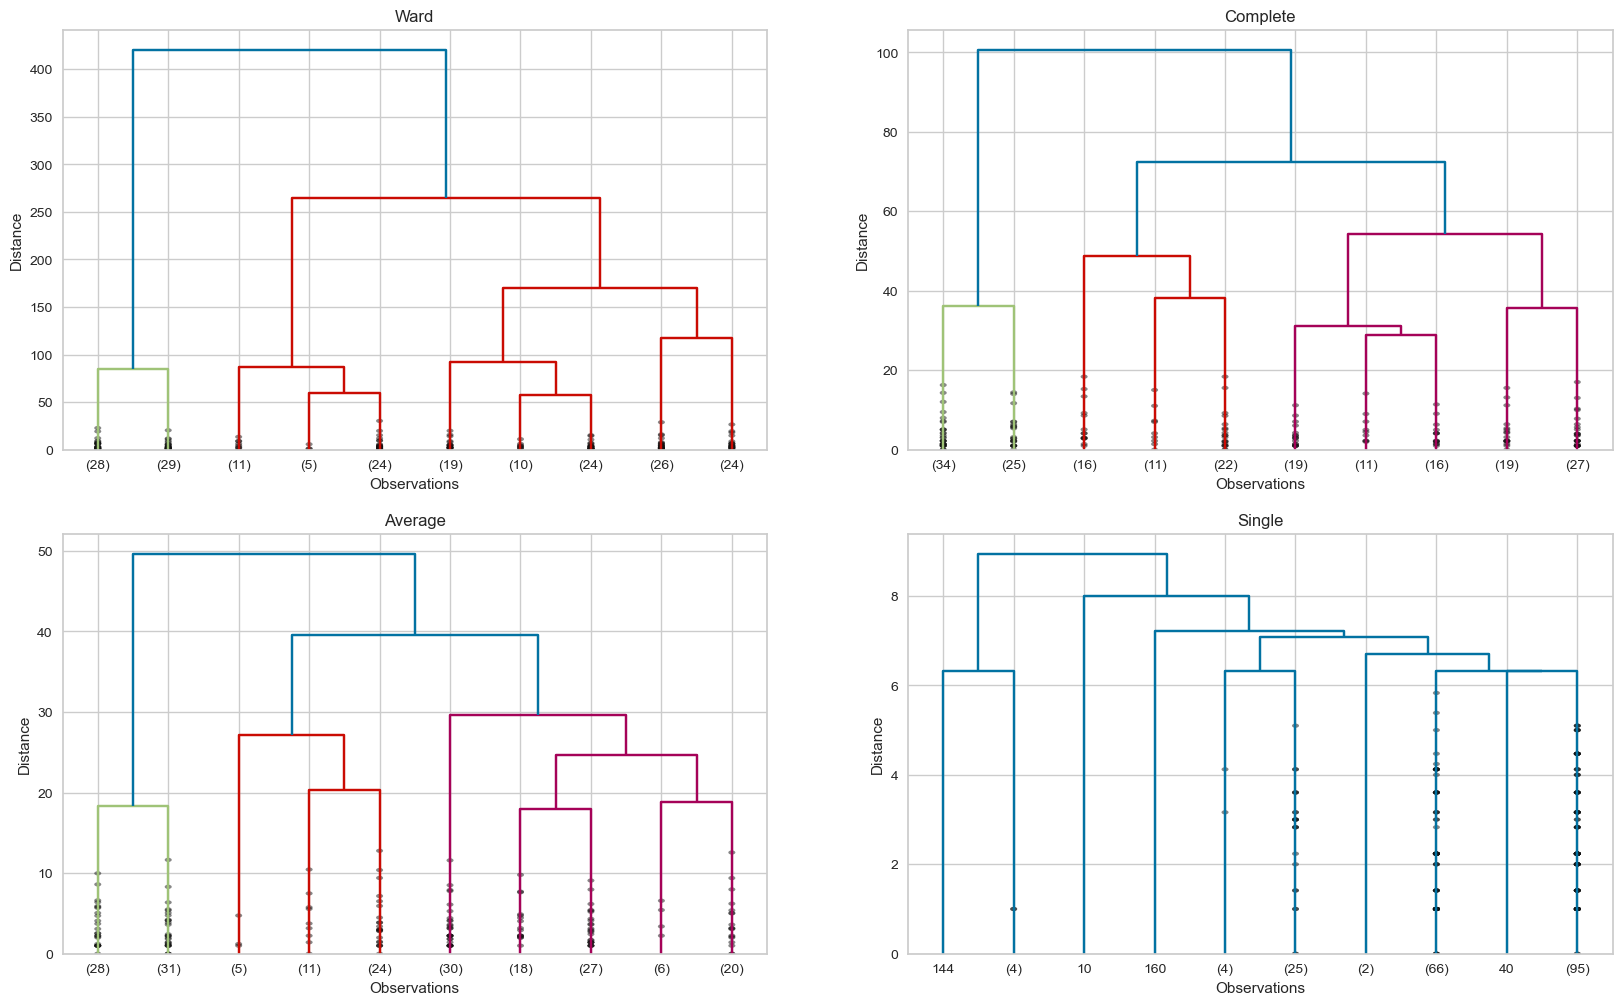

In [68]:
hc_ward = linkage(y=X1, method="ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

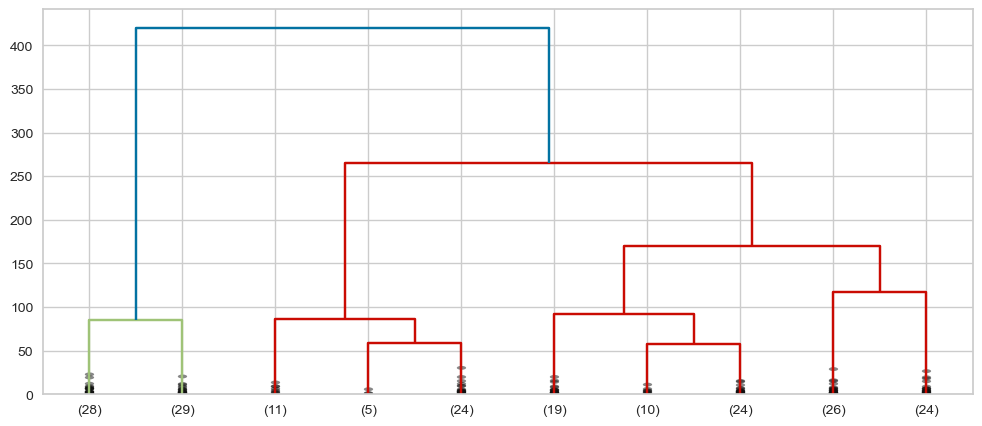

In [69]:
plt.figure(figsize = (12,5))
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

### silhouette_score

In [70]:
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


# Clustering based on Annual Income and Spending Score

In [71]:
X2

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


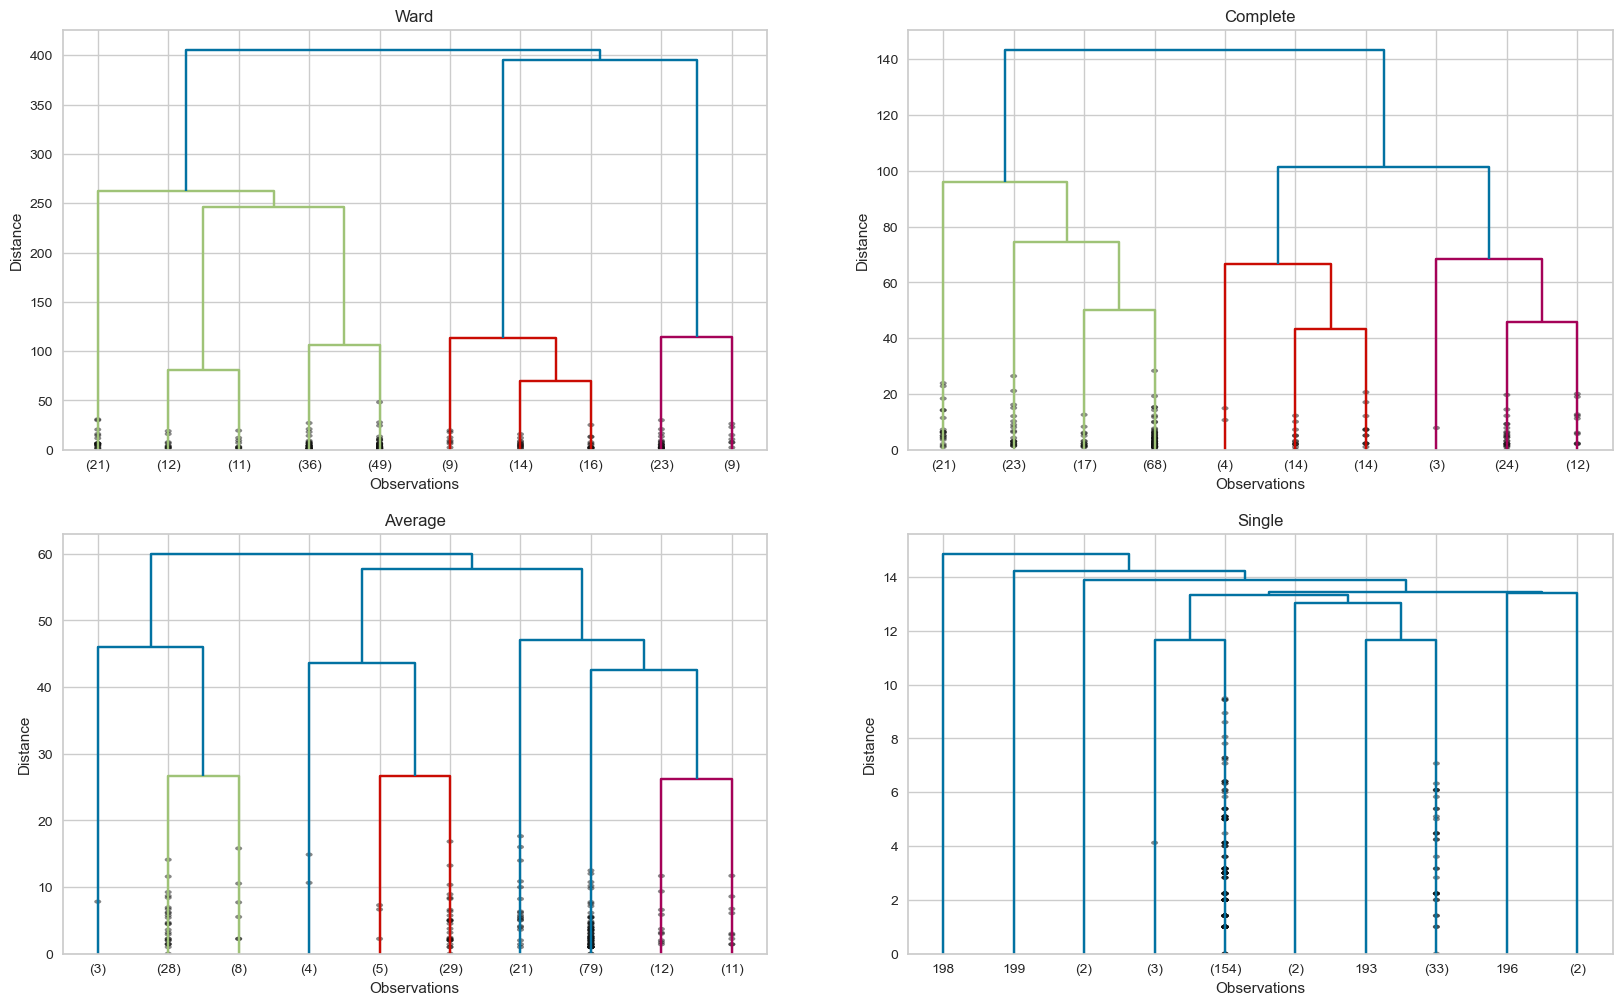

In [72]:
hc_ward = linkage(y=X2, method="ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

In [73]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [74]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [75]:
X1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


In [76]:
model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X1)

In [77]:
df_X1

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
5,22,76,1
6,35,6,2
7,23,94,1
8,64,3,2
9,30,72,1


In [78]:
df_X1['cluster_Agg'] = clusters
df_X1.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [79]:
X2

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [80]:

model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') #older sklearn
clusters2 = model2.fit_predict(X2)

In [81]:
copyX2

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
5,17,76,2
6,18,6,4
7,18,94,2
8,19,3,4
9,19,72,2


In [82]:
copyX2['cluster_Agg'] = clusters2
copyX2.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4


locations are almost the same (cluster_Kmeans - cluster_Agg)

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

In [83]:
df_X1

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0
5,22,76,1,3
6,35,6,2,2
7,23,94,1,3
8,64,3,2,2
9,30,72,1,3


<Axes: xlabel='Age', ylabel='Spending_Score'>

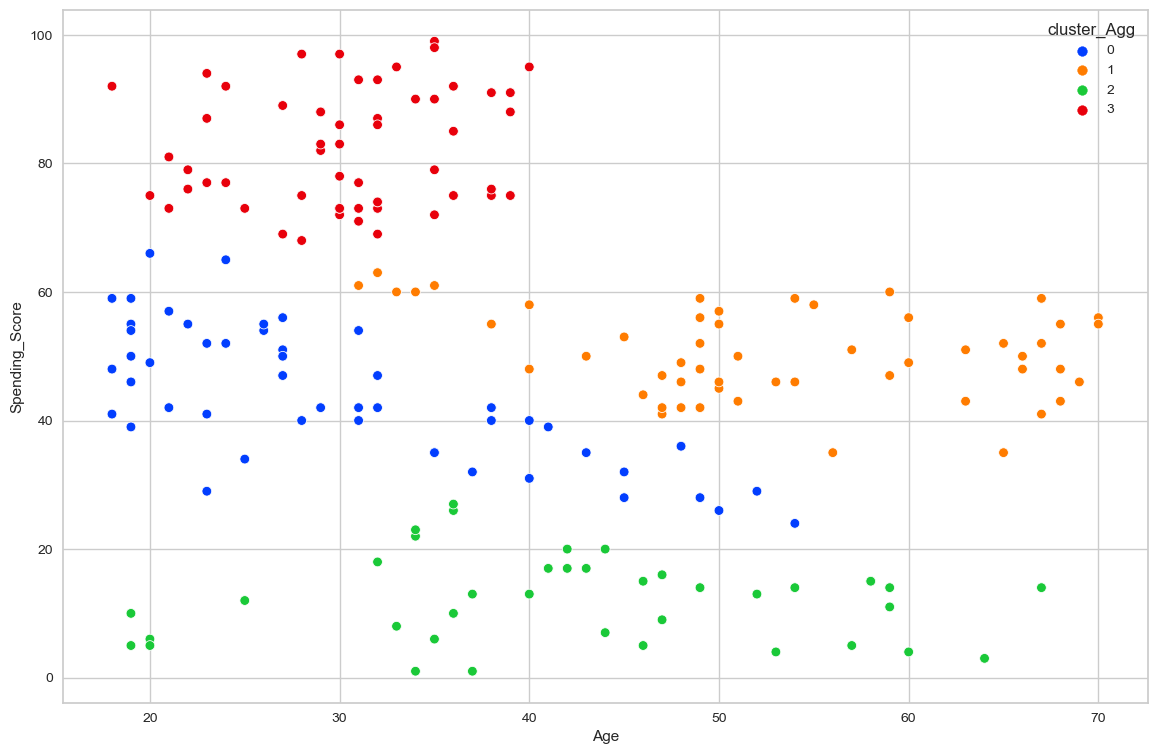

In [84]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_X1,
                palette="bright")

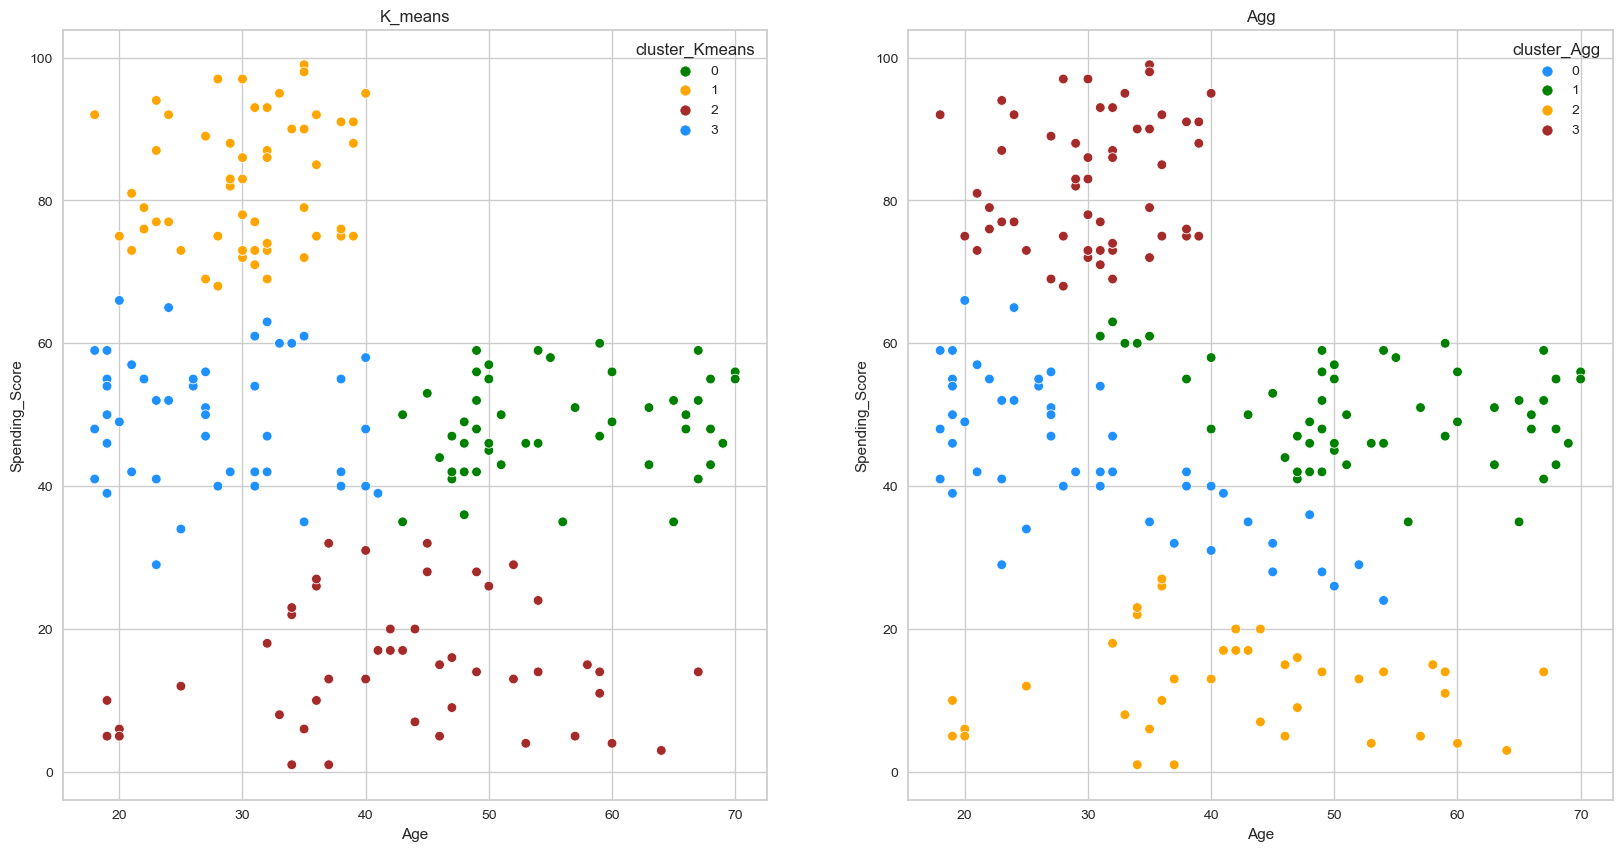

In [85]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=df_X1,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_X1,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

Kmeans is better separated.

#### Annual Income and Spending Score- x2

In [86]:
copyX2

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
5,17,76,2,3
6,18,6,4,4
7,18,94,2,3
8,19,3,4,4
9,19,72,2,3


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

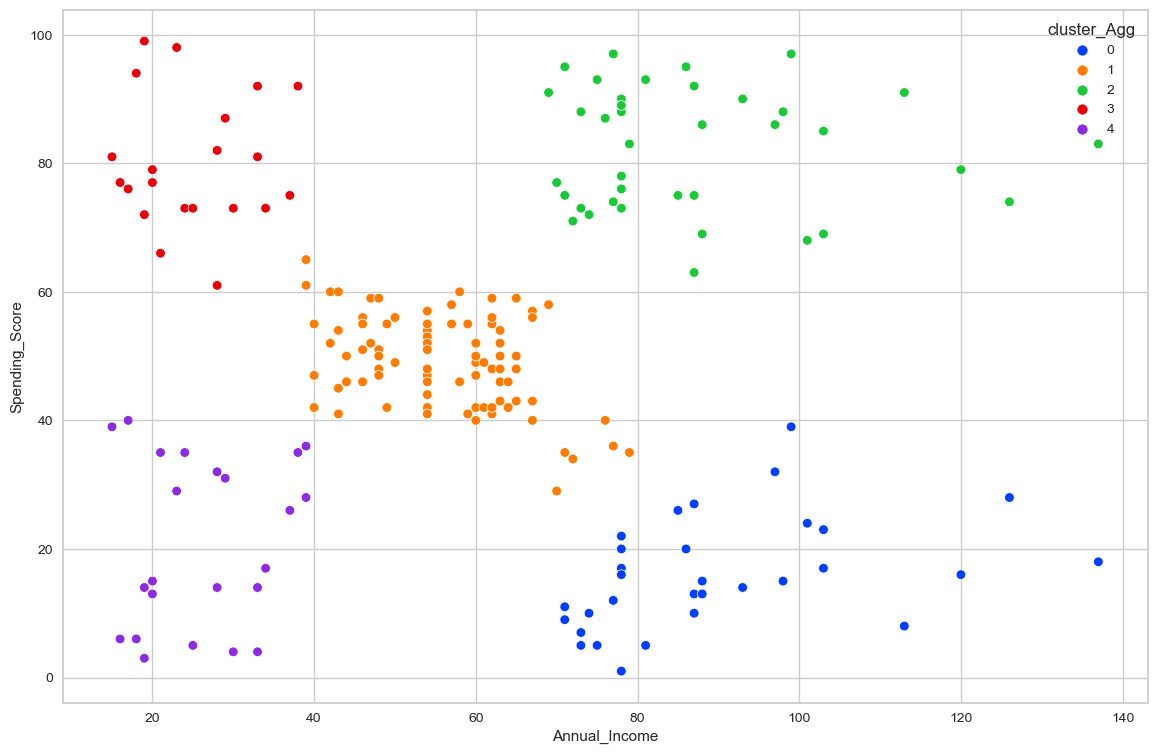

In [87]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=copyX2 ,
                palette="bright")

Text(0.5, 1.0, 'Agg')

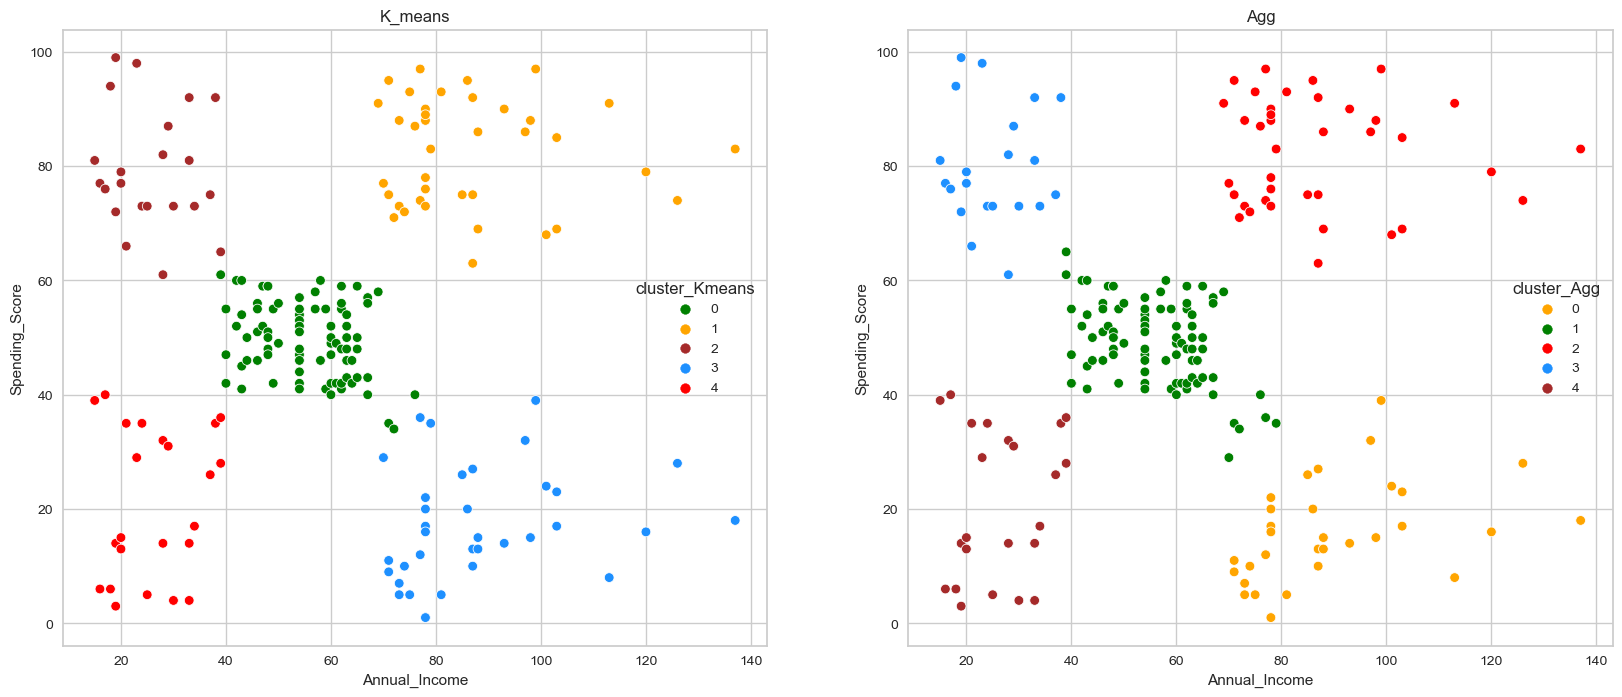

In [88]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=copyX2,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=copyX2,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg")

After looking at the charts and analyzing them it was confirmed Kmeans algorithm finally it is the best

#### Interpretation based on Age and Spending Score- x1

In [89]:
df_X1

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0
5,22,76,1,3
6,35,6,2,2
7,23,94,1,3
8,64,3,2,2
9,30,72,1,3


[Text(0, 0, '57'), Text(0, 0, '48'), Text(0, 0, '48'), Text(0, 0, '47')]

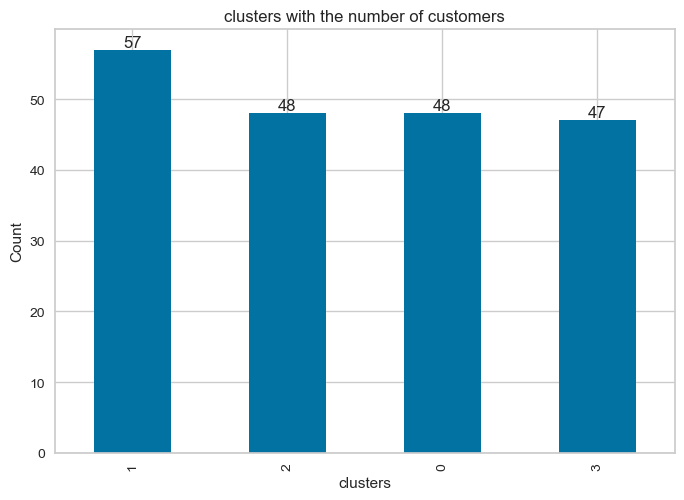

In [90]:
# I want to see the number of poeple in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_X1.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [91]:
df["cluster_Age_Spending_Score"] = df_X1.cluster_Kmeans
df.head()

# We add clusters resulting from Kmeans to our df (age-spending score)

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


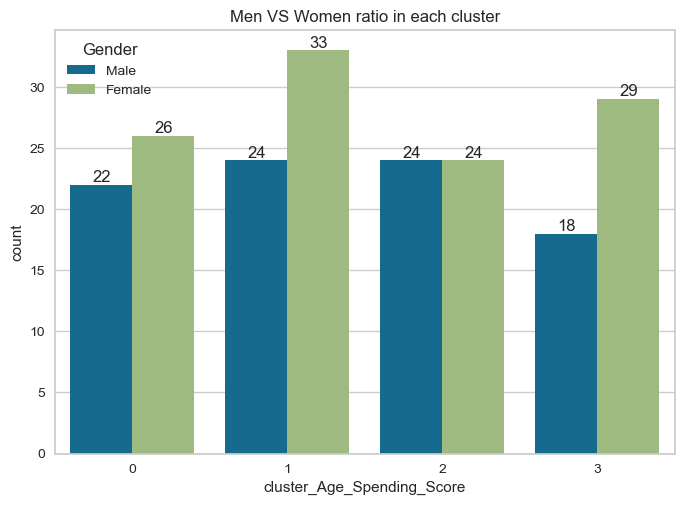

In [92]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
# We count clusters according to gender.
# 2 and 3 clusters draw attention to the excess of women.

In [93]:
df.groupby("cluster_Age_Spending_Score").mean()
# We group them according to the clusters formed.

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,30.175439,66.070175,82.350877
2,43.291667,66.937500,15.020833
3,27.617021,53.276596,49.148936


<Axes: xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score'>

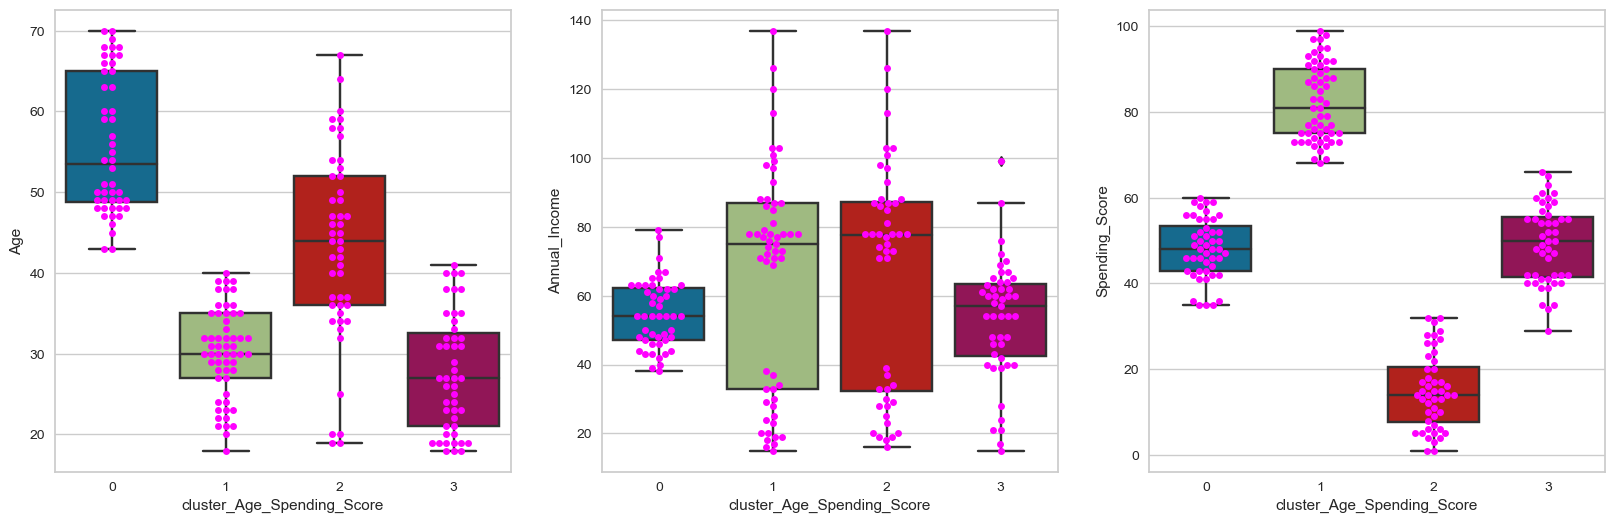

In [94]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Age",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Annual_Income",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Spending_Score",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

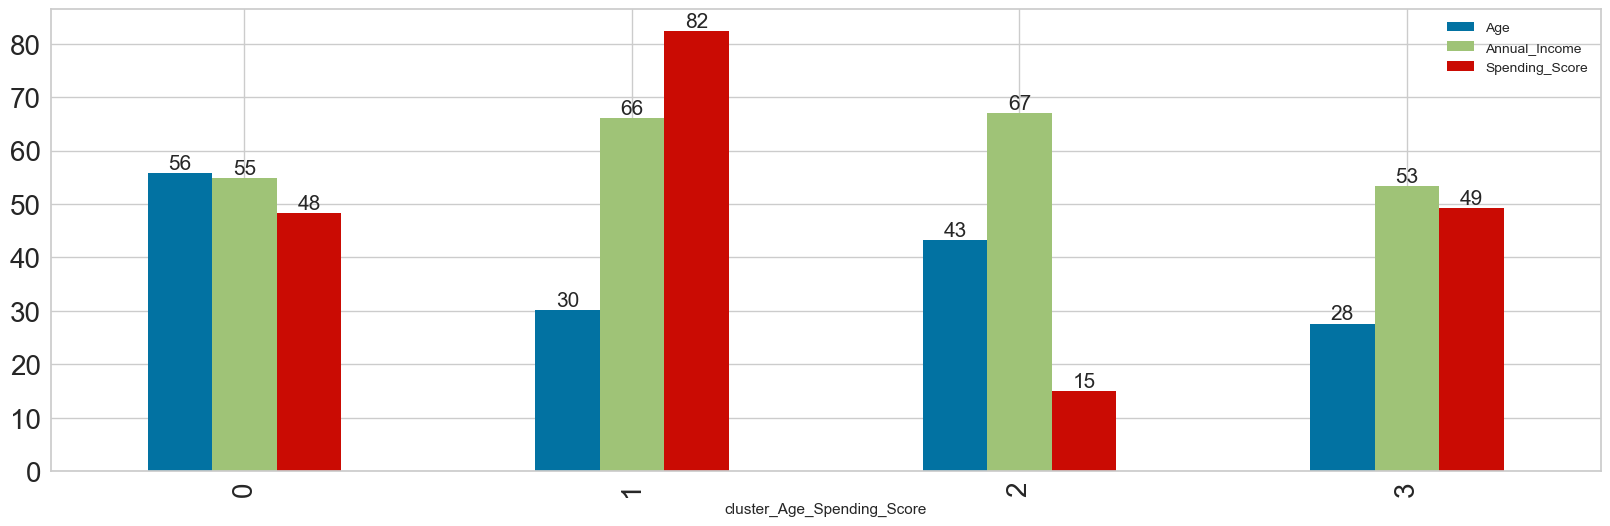

In [95]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

# Note that we are using df.groupby("cluster_Age_Spending_Score").mean().

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [96]:
copyX2

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
5,17,76,2,3
6,18,6,4,4
7,18,94,2,3
8,19,3,4,4
9,19,72,2,3


In [97]:
copyX2.cluster_Kmeans.value_counts()

0    81
1    39
3    35
4    23
2    22
Name: cluster_Kmeans, dtype: int64

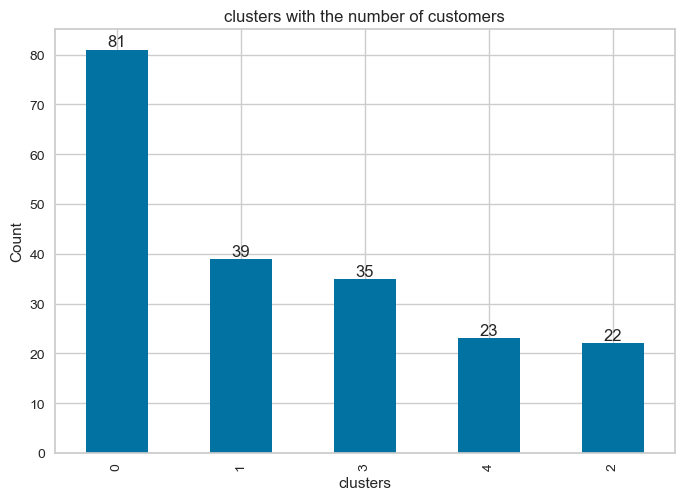

In [98]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = copyX2.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [99]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


In [100]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

# According to Annual_Income and Spending_Score,
# we drop the cluster_Age_Spending_Score to get results according to the clusters we created with Kmeans

In [101]:
df["cluster_Annual_Income_Spending_Score"] = copyX2.cluster_Kmeans
df.head()
# Add cluster_Annual_Income_Spending_Score column.

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


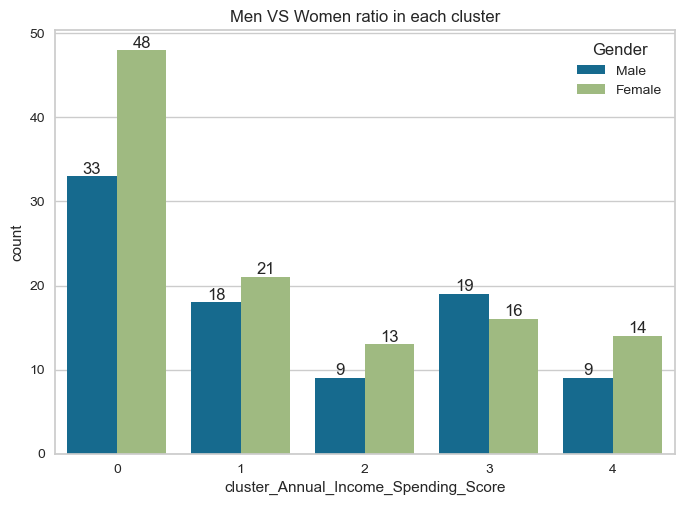

In [102]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [103]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

# here we group df by both Gender and cluster_Annual_Income_Spending_Score.

Age  Annual_Income  Spending_Score
Gender cluster_Annual_Income_Spending_Score                                          
Female 0                                     40.895833      55.354167       49.000000
       1                                     32.190476      86.047619       81.666667
       2                                     25.461538      25.692308       80.538462
       3                                     43.250000      90.937500       22.062500
       4                                     43.214286      27.357143       21.714286
Male   0                                     45.363636      55.212121       50.272727
       1                                     33.277778      87.111111       82.666667
       2                                     25.000000      25.777778       77.666667
       3                                     39.315789      85.894737       12.947368
       4                                     48.333333      24.666667       19.666667

<Axes: xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending_Score'>

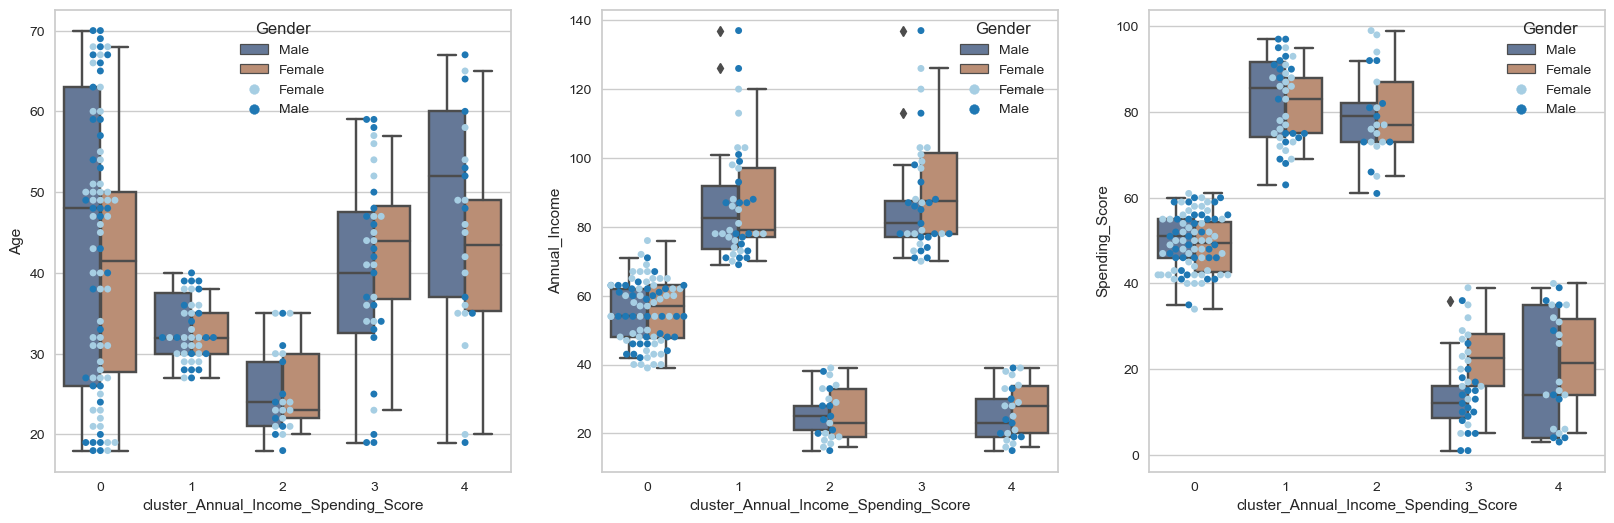

In [104]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score",
            hue= "Gender", data = df,palette="deep",saturation=0.5)
sns.swarmplot(y = "Age", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data = df, palette="deep",saturation=0.5)
sns.swarmplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data=df, palette="deep",saturation=0.5);
sns.swarmplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

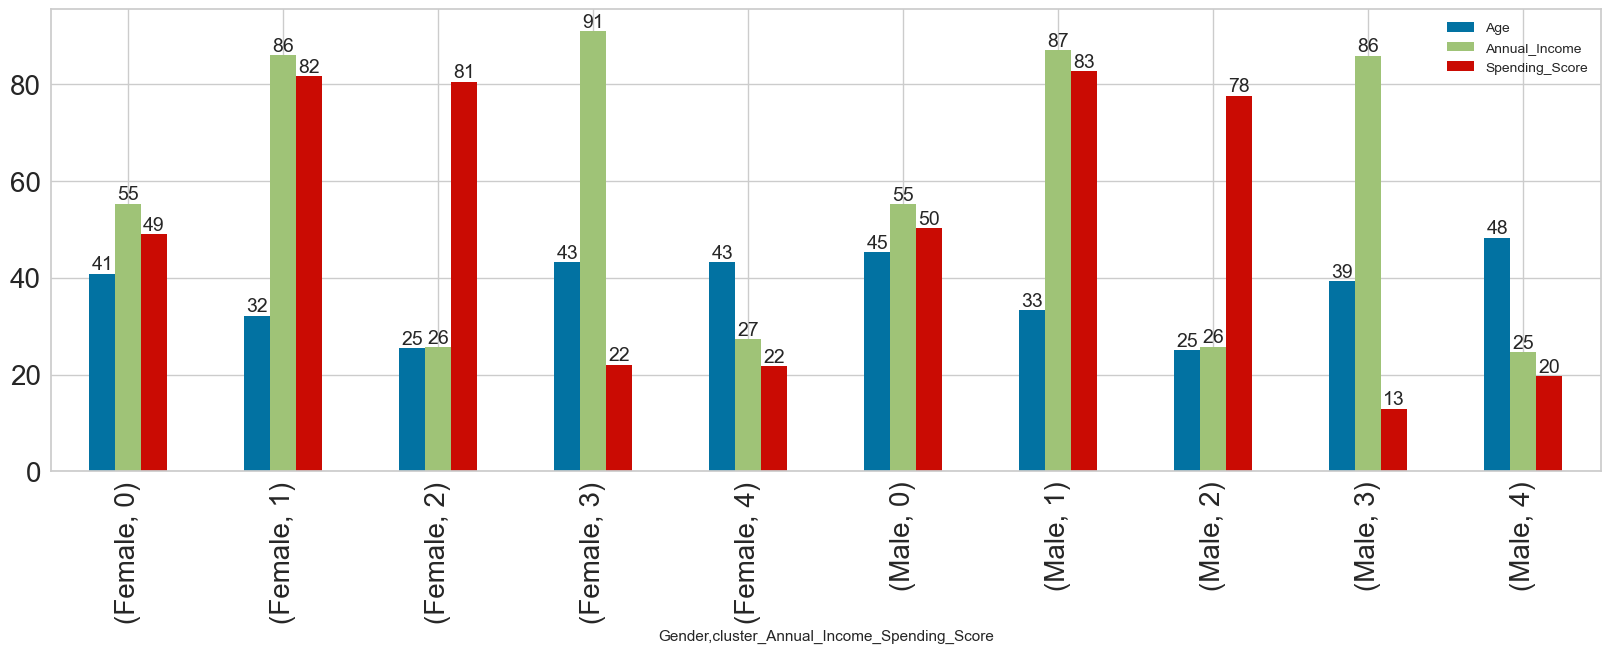

In [105]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

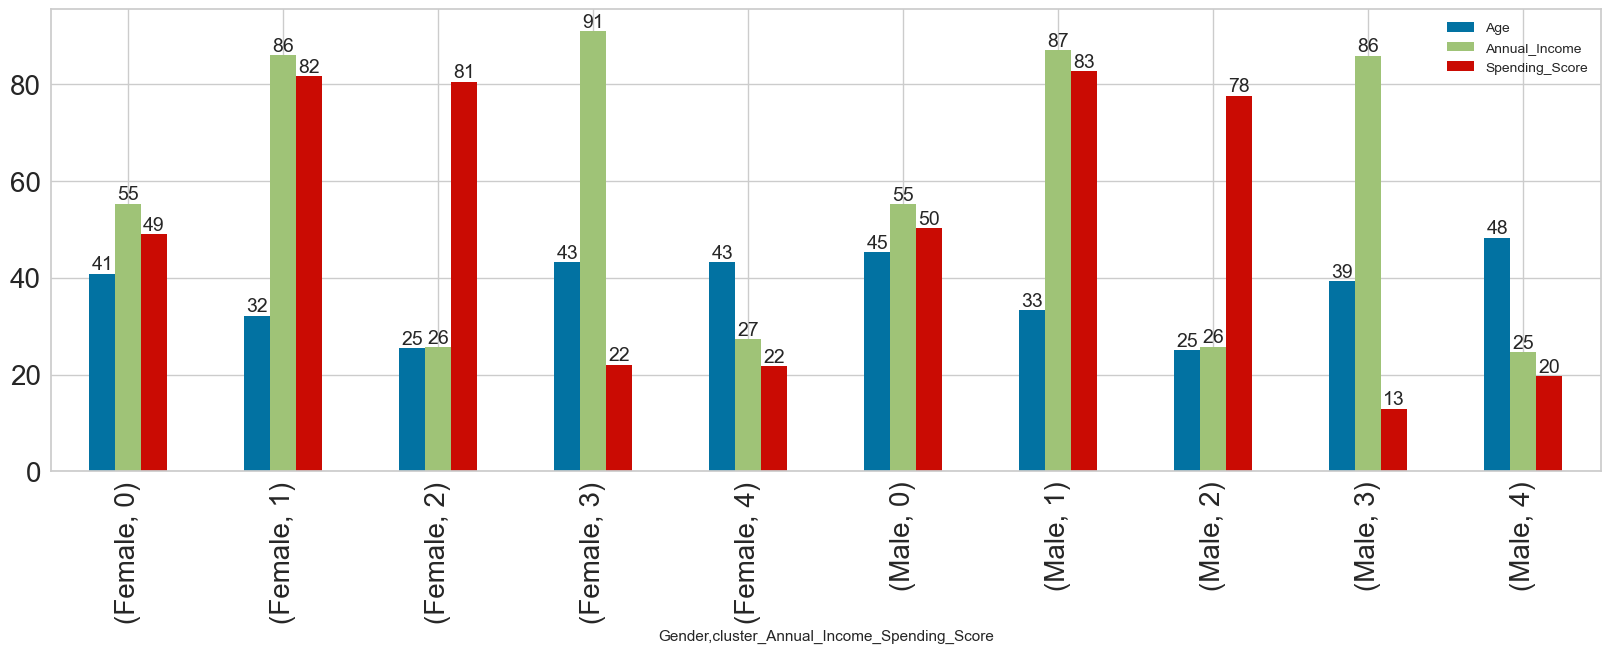

In [106]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___